In [1]:
import obspy
from obspy import UTCDateTime
from obspy.clients import fdsn

In [2]:
t1 = UTCDateTime(2023, 7, 20) # Start time
t2 = UTCDateTime(2023, 7, 21) # End time
delta = 1800 # time in seconds, reduce to reduce file size
stas = [2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316] #station identifiers of full set for ZE2023

stas = [2316] # station id's actually used for resampling

DATASELECT = 'http://service.iris.edu/ph5ws/dataselect/1'
c = fdsn.client.Client(
    service_mappings={
        'dataselect': DATASELECT,
    },
)
c.set_credentials('', '')

tNow = t1 #start time
req = [] #UNSURE????
while tNow < t2:
    print(tNow)
    for nowsta in stas:
        # req.append(('ZE', nowsta, '', 'GPZ', tNow, tNow+delta))
        print(nowsta)
        print('Getting data')
        S = c.get_waveforms('ZE', nowsta, '', 'GPZ', tNow, tNow+delta)
        print('Resampling')
        S.resample(250) # resampled rate for final analysis. note: remeber what Nyquist f you would like to work with, multiply by <1.5 for this value
        print('Saving')
        for tr in S:
            filename = 'C:/Users/tkenyon/Documents/FluvialSeismology_Analysis/data/{}_{}.mseed'.format(tr.id, tr.stats.starttime.strftime('%Y%m%d%H%M%S')) # data format, tr.id==data directory, time format
            tr.write(filename)
    tNow = tNow + delta

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Users\tkenyon\AppData\Local\miniforge3\envs\obspy\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Users\tkenyon\AppData\Local\miniforge3\envs\obspy\Lib\site-packages\obspy\clients\fdsn\client.py", line 1543, in run
    code, data = download_url(
                 ^^^^^^^^^^^^^
  File "C:\Users\tkenyon\AppData\Local\miniforge3\envs\obspy\Lib\site-packages\obspy\clients\fdsn\client.py", line 1972, in download_url
    data = f.read()
           ^^^^^^^^
  File "C:\Users\tkenyon\AppData\Local\miniforge3\envs\obspy\Lib\gzip.py", line 301, in read
    return self._buffer.read(size)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tkenyon\AppData\Local\miniforge3\envs\obspy\Lib\_compression.py", line 118, in readall
    while data := self.read(sys.maxsize):
                  ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tkenyon\AppData\Local\miniforge3\envs\obspy\Lib\gzip.py", line 499, in read

2023-07-20T00:00:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T00:30:00.000000Z
2316
Getting data


C:\Users\tkenyon\AppData\Local\miniforge3\envs\obspy\Lib\site-packages\obspy\io\mseed\core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


Resampling
Saving
2023-07-20T01:00:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T01:30:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T02:00:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T02:30:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T03:00:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T03:30:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T04:00:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T04:30:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T05:00:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T05:30:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T06:00:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T06:30:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T07:00:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T07:30:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T08:00:00.000000Z
2316
Getting data
Resampling
Saving
2023-07-20T08:30:00.00

C:\Users\tkenyon\Documents\FluvialSeismology_Analysis\waveformUtils.py:343: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels)
C:\Users\tkenyon\Documents\FluvialSeismology_Analysis\waveformUtils.py:361: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
C:\Users\tkenyon\AppData\Local\Temp\1\ipykernel_20168\645960183.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


2023-07-20T23:00:00.000000Z


C:\Users\tkenyon\AppData\Local\Temp\1\ipykernel_20168\645960183.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f1.show()


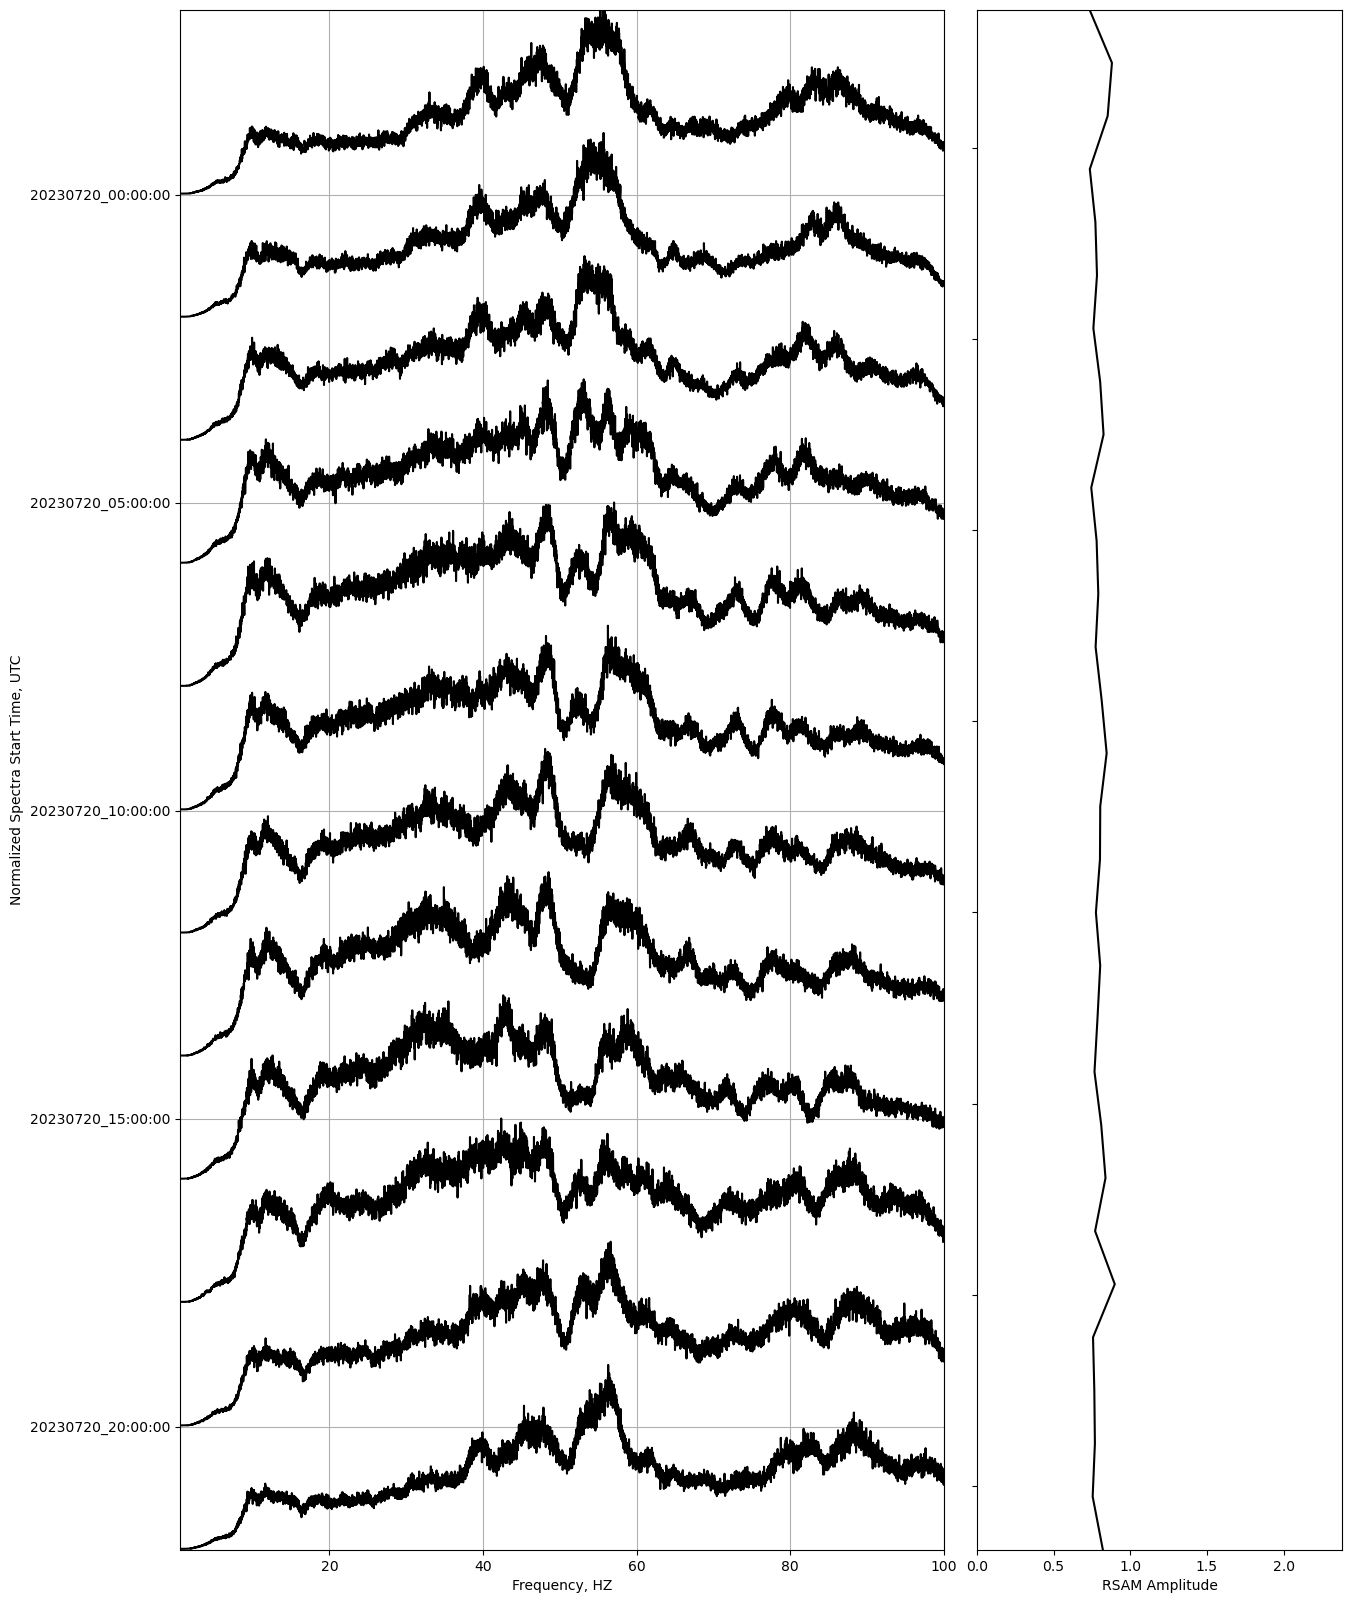

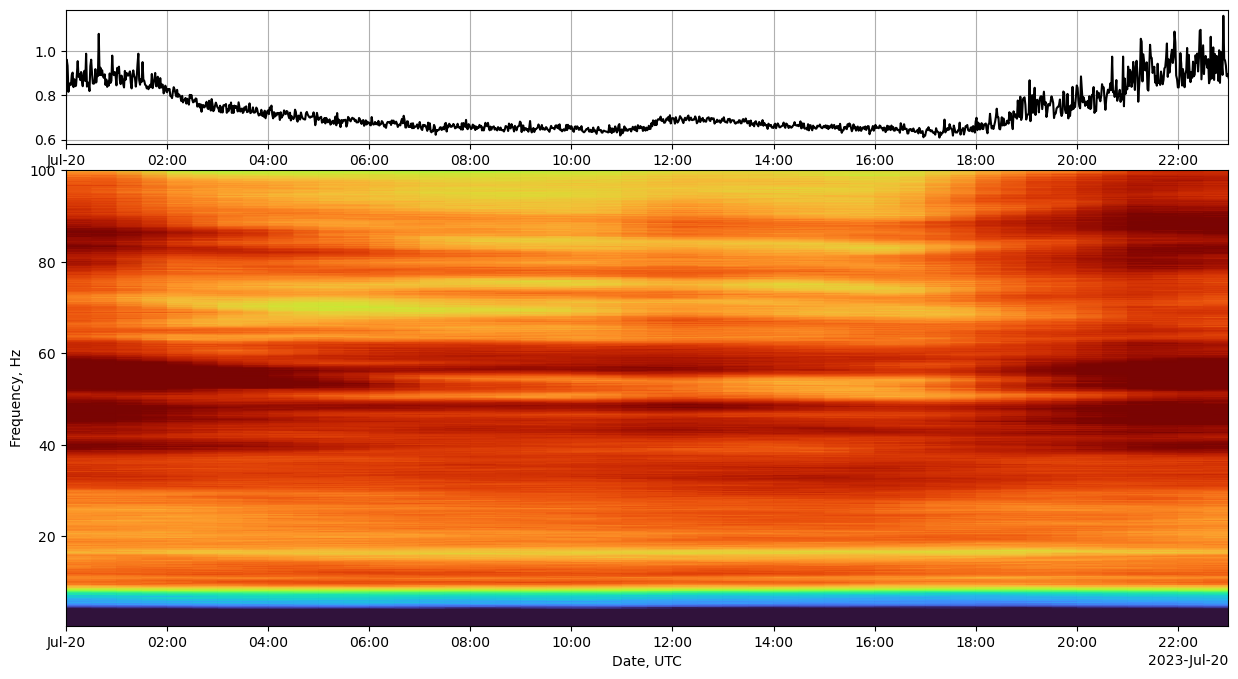

In [4]:
#%%
#import sys
#sys.path.append('C:/Users/tkeny/miniforge3/envs/obspy/')
import waveformUtils
import obspy
S = obspy.read('C:/Users/tkenyon/Documents/FluvialSeismology_Analysis/data/ZE.2316*')

f, spectraF, spectraG, sttimes, tvec, RSAM = waveformUtils.plotSpectraTime(S, minfreq=0.5, maxfreq=100, winlength=3600,
                                                                           step=7200,
                                                                           spacing=2, ampScalar=3, normalize=True,
                                                                           specWin=60,
                                                                           specStep=30, rsamWin=1, saveFig=False)

f.show()

f1 = waveformUtils.multiDaySpectrogram(S, averageLength=3600, fftLength=60, minFreq=0.5, maxFreq=100, cmap='turbo',
                                      dateLimits=None,
                                      vmin=0.4, vmax=0.9, plotAverage=True)

f1.show()